In [194]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [195]:
preprocessed_dataset = pd.read_csv("preprocessed_dataset.csv")

In [196]:
X = preprocessed_dataset.drop(columns=["calories"])
Y = preprocessed_dataset["calories"]

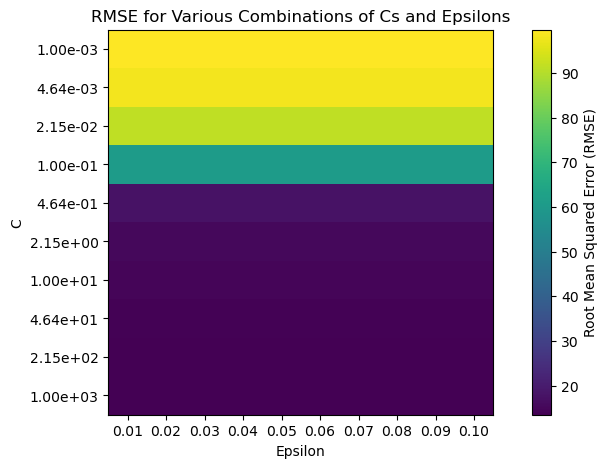

In [197]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, shuffle=True, random_state=0,
)
X_train, X_validation, Y_train, Y_validation = train_test_split(
    X_train, Y_train, test_size=0.2, shuffle=True, random_state=0
)

Cs = np.logspace(-3, 3, 10)
epsilons = np.linspace(0.01, 0.1, 10)

rmses = np.zeros((len(Cs), len(epsilons)))

for i, C in enumerate(Cs):
    for j, epsilon in enumerate(epsilons):
        svr = SVR(kernel='linear', C=C, epsilon=epsilon)
        svr.fit(X_train, Y_train)
        
        prediction_y_val = svr.predict(X_validation)
        rmses[i, j] = np.sqrt(np.mean((Y_validation - prediction_y_val) ** 2))

plt.figure(figsize=(10, 5))
plt.imshow(rmses)
plt.colorbar(label='Root Mean Squared Error (RMSE)')
plt.xlabel('Epsilon')
plt.ylabel('C')
plt.xticks(np.arange(len(epsilons)), [f'{e:.2f}' for e in epsilons])
plt.yticks(np.arange(len(Cs)), [f'{c:.2e}' for c in Cs])
plt.title('RMSE for Various Combinations of Cs and Epsilons')
plt.show()

In [198]:
# We can see that epsilon does not have a significant effect on the RMSE, while C's have a more significant effect.
# As C increases, so does the RMSE generally. Let's use the best combination of C and epsilon to train a model to use on the testing data. 

best_C_index, best_epsilon_index = np.unravel_index(np.argmin(rmses), rmses.shape)
best_C = Cs[best_C_index]
best_epsilon = epsilons[best_epsilon_index]

print(f"Best C: {best_C}")
print(f"Best epsilon: {best_epsilon}")

model = SVR(kernel='linear', C=best_C, epsilon=best_epsilon)
model.fit(X_train, Y_train)
predicted_y_test = model.predict(X_test)

rmse = np.sqrt(np.mean((Y_test - predicted_y_test) ** 2))
print(f"Test RMSE: {rmse}")

Best C: 215.44346900318823
Best epsilon: 0.020000000000000004
Test RMSE: 10.177145367141357


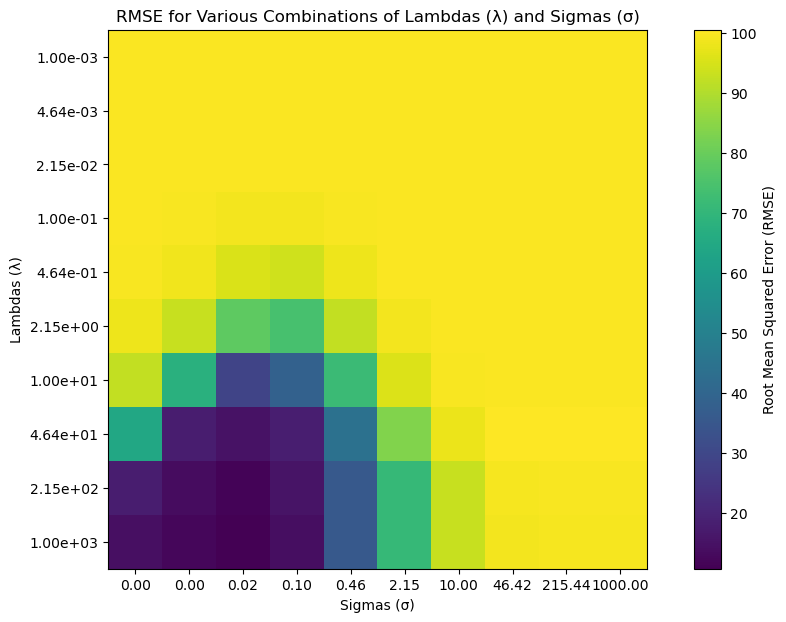

In [199]:
# Let's now attempt to use a RBF Kernel for the SVR. We need to optimize Lambda (λ) and Sigma (σ)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, shuffle=True, random_state=0,
)
X_train, X_validation, Y_train, Y_validation = train_test_split(
    X_train, Y_train, test_size=0.2, shuffle=True, random_state=0
)

lambdas = np.logspace(-3, 3, 10)
sigmas = np.logspace(-3, 3, 10)

rmses = np.zeros((len(lambdas), len(sigmas)))

for i, lmbda in enumerate(lambdas):
    for j, sigma in enumerate(sigmas):
        svr = SVR(kernel='rbf', C=lmbda, gamma=sigma)
        svr.fit(X_train, Y_train)
        
        prediction_y_val = svr.predict(X_validation)
        rmses[i, j] = np.sqrt(np.mean((Y_validation - prediction_y_val) ** 2))

plt.figure(figsize=(12, 7))
plt.imshow(rmses)
plt.colorbar(label='Root Mean Squared Error (RMSE)')
plt.xlabel('Sigmas (σ)')
plt.ylabel('Lambdas (λ)')
plt.xticks(np.arange(len(sigmas)), [f'{sigma:.2f}' for sigma in sigmas])
plt.yticks(np.arange(len(lambdas)), [f'{lmbd:.2e}' for lmbd in lambdas])
plt.title('RMSE for Various Combinations of Lambdas (λ) and Sigmas (σ)')
plt.show()

In [200]:
# We see that increasing values for λ and σ can lead to overfitting. There is an apparent goldilock's zone visually around λ=1000 and σ=0.2
# Let's train our model on this specifically
best_lmbda_index, best_sigma_index = np.unravel_index(np.argmin(rmses), rmses.shape)
best_lmbda = lambdas[best_lmbda_index]
best_sigma = sigmas[best_sigma_index]

print(f"Best Lambda λ: {best_lmbda}")
print(f"Best sigma σ: {best_sigma}")

model = SVR(kernel='rbf', C=best_lmbda, gamma=best_sigma)
model.fit(X_train, Y_train)
predicted_y_test = model.predict(X_test)

rmse = np.sqrt(np.mean((Y_test - predicted_y_test) ** 2))
print(f"Test RMSE: {rmse}")

Best Lambda λ: 1000.0
Best sigma σ: 0.021544346900318832
Test RMSE: 14.93500462092636
